# Mô tả dữ liệu


**Bộ dữ liệu tổng hợp này cung cấp một loạt các tính năng toàn diện liên quan đến sức khỏe tim mạch và lựa chọn lối sống, bao gồm các chi tiết cụ thể của bệnh nhân như tuổi, giới tính, mức cholesterol, huyết áp, nhịp tim và các chỉ số như bệnh tiểu đường, tiền sử gia đình, thói quen hút thuốc, béo phì và uống rượu. Ngoài ra, các yếu tố lối sống như giờ tập thể dục, thói quen ăn uống, mức độ căng thẳng và giờ ít vận động cũng được đưa vào. Các khía cạnh y tế bao gồm các vấn đề về tim trước đây, việc sử dụng thuốc và mức chất béo trung tính được xem xét. Các khía cạnh kinh tế xã hội như thu nhập và các thuộc tính địa lý như quốc gia, châu lục và bán cầu được kết hợp. Bộ dữ liệu, bao gồm 8763 hồ sơ từ bệnh nhân trên toàn cầu, đạt đến đỉnh cao trong một tính năng phân loại nhị phân quan trọng biểu thị sự có hoặc không có nguy cơ đau tim, cung cấp một nguồn tài nguyên toàn diện để phân tích dự đoán và nghiên cứu về sức khỏe tim mạch.**
- **Patient ID**: Mã định danh duy nhất cho mỗi bệnh nhân
- **Age**: Tuổi của bệnh nhân
- **Sex**: Giới tính của bệnh nhân (Nam/Nữ)
- **Cholesterol**: Mức cholesterol của bệnh nhân
- **Blood Pressure**: Huyết áp của bệnh nhân (systolic/diastolic)
- **Heart Rate**: Nhịp tim của bệnh nhân
- **Diabetes**: Bệnh nhân có mắc bệnh tiểu đường không (Có/Không)
- **Family History**: Tiền sử gia đình có các vấn đề về tim mạch (1: Có, 0: Không)
- **Smoking**: Trạng thái hút thuốc của bệnh nhân (1: Có hút thuốc, 0: Không hút thuốc)
- **Obesity**: Tình trạng béo phì của bệnh nhân (1: Béo phì, 0: Không béo phì)
- **Alcohol Consumption**: Mức tiêu thụ rượu của bệnh nhân (Không/Cao/Trung bình/Nặng)
- **Exercise Hours Per Week**: Số giờ tập thể dục mỗi tuần
- **Diet**: Thói quen ăn uống của bệnh nhân (Lành mạnh/Trung bình/Kém lành mạnh)
- **Previous Heart Problems**: Các vấn đề về tim trước đó của bệnh nhân (1: Có, 0: Không)
- **Medication Use**: Bệnh nhân có sử dụng thuốc không (1: Có, 0: Không)
- **Stress Level**: Mức độ căng thẳng của bệnh nhân (1-10)
- **Sedentary Hours Per Day**: Số giờ ít vận động mỗi ngày của bệnh nhân
- **Income**: Mức thu nhập của bệnh nhân
- **BMI**: Chỉ số khối cơ thể (BMI) của bệnh nhân
- **Triglycerides**: Mức triglyceride của bệnh nhân
- **Physical Activity Days Per Week**: Số ngày hoạt động thể chất mỗi tuần
- **Sleep Hours Per Day**: Số giờ ngủ mỗi ngày
- **Country**: Quốc gia của bệnh nhân
- **Continent**: Châu lục nơi bệnh nhân sinh sống
- **Hemisphere**: Bán cầu nơi bệnh nhân sinh sống
- **Heart Attack Risk**: Sự hiện diện của nguy cơ đau tim (1: Có, 0: Không)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = '/content/drive/My Drive/Khai phá dữ liệu/heart_attack_prediction_dataset.csv'


#1. Import Libraries

In [ ]:
import pandas as pd
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as pit

import scipy as sc
import sklearn as sk
import seaborn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#2. Đọc dữ liệu

In [ ]:
data = pd.read_csv(file)
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
data.shape

(8763, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

#3. Làm sạch dữ liệu


##3.1 Hiểu dữ liệu

In [ ]:
#Xóa những cột không cần thiết
columns_to_drop=['Hemisphere','Continent','Patient ID','Income']
data.drop(columns=columns_to_drop,inplace=True)
data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,31.251233,286,0,6,Argentina,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,27.194973,235,1,7,Canada,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,28.176571,587,4,4,France,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,36.464704,378,3,4,Canada,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,21.809144,231,1,5,Thailand,0


In [ ]:
columns_names = data.columns
print(columns_names)

Index(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Heart Attack Risk'],
      dtype='object')


##3.2 Kiểm tra và điền gía trị  thiếu

In [ ]:
# Kiểm tra các giá trị thiếu
missing_values = data.isnull().sum()
print("Số lượng giá trị bị thiếu trong mỗi cột:")
print(missing_values)

Số lượng giá trị bị thiếu trong mỗi cột:
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Heart Attack Risk                  0
dtype: int64


In [ ]:
#Kiểm tra các giá trị
for col in columns_names:
    print(f"- {col}: {data[col].unique()}")

- Age: [67 21 84 66 54 90 20 43 73 71 77 60 88 69 38 50 45 36 48 40 79 63 27 25
 86 42 52 29 30 47 44 33 51 70 85 31 56 24 74 72 55 26 53 46 57 22 35 39
 80 65 83 82 28 19 75 18 34 37 89 32 49 23 59 62 64 61 76 41 87 81 58 78
 68]
- Sex: ['Male' 'Female']
- Cholesterol: [208 389 324 383 318 297 358 220 145 248 373 374 228 259 122 379 166 303
 340 294 359 202 133 159 271 273 328 154 135 197 321 375 360 263 201 347
 129 229 251 121 190 185 279 336 192 180 203 368 222 243 218 120 285 377
 369 311 139 266 153 339 329 333 398 124 183 163 362 390 200 396 255 209
 247 250 227 246 223 330 195 194 178 155 240 237 216 276 224 326 198 301
 314 304 334 213 254 230 316 277 388 206 384 205 261 308 338 382 291 168
 171 378 253 245 226 281 123 173 231 234 268 306 186 293 161 380 239 149
 320 219 335 265 126 307 270 225 193 148 296 136 364 353 252 232 387 299
 357 214 370 345 351 344 152 150 131 272 302 337 170 356 274 188 125 138
 376 181 184 275 394 128 217 399 283 289 284 327 262 212 350 385 162 141

In [ ]:
data.copy()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,31.251233,286,0,6,Argentina,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,27.194973,235,1,7,Canada,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,28.176571,587,4,4,France,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,36.464704,378,3,4,Canada,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,21.809144,231,1,5,Thailand,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,1,1,8,10.806373,19.655895,67,7,7,Thailand,0
8759,28,Female,120,157/102,73,1,0,0,1,0,...,0,0,8,3.833038,23.993866,617,4,9,Canada,0
8760,47,Male,250,161/75,105,0,1,1,1,1,...,1,0,5,2.375214,35.406146,527,4,4,Brazil,1
8761,36,Male,178,119/67,60,1,0,1,0,0,...,1,1,5,0.029104,27.294020,114,2,8,Brazil,0


In [ ]:
data['Diet'].head()

,Diet
0,Average
1,Unhealthy
2,Healthy
3,Average
4,Unhealthy


In [ ]:
print(data.columns)


Index(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Heart Attack Risk'],
      dtype='object')


##3.3 Làm sạch dữ liệu

In [ ]:
# tách cột Blood Pressure thành 2 cột systolic_Pressure và diastolic_Pressure
data[['systolic_Pressure', 'diastolic_Pressure']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)
data.drop('Blood Pressure', axis=1, inplace=True)
data[['systolic_Pressure', 'diastolic_Pressure']].head()

,systolic_Pressure,diastolic_Pressure
0,158,88
1,165,93
2,174,99
3,163,100
4,91,88


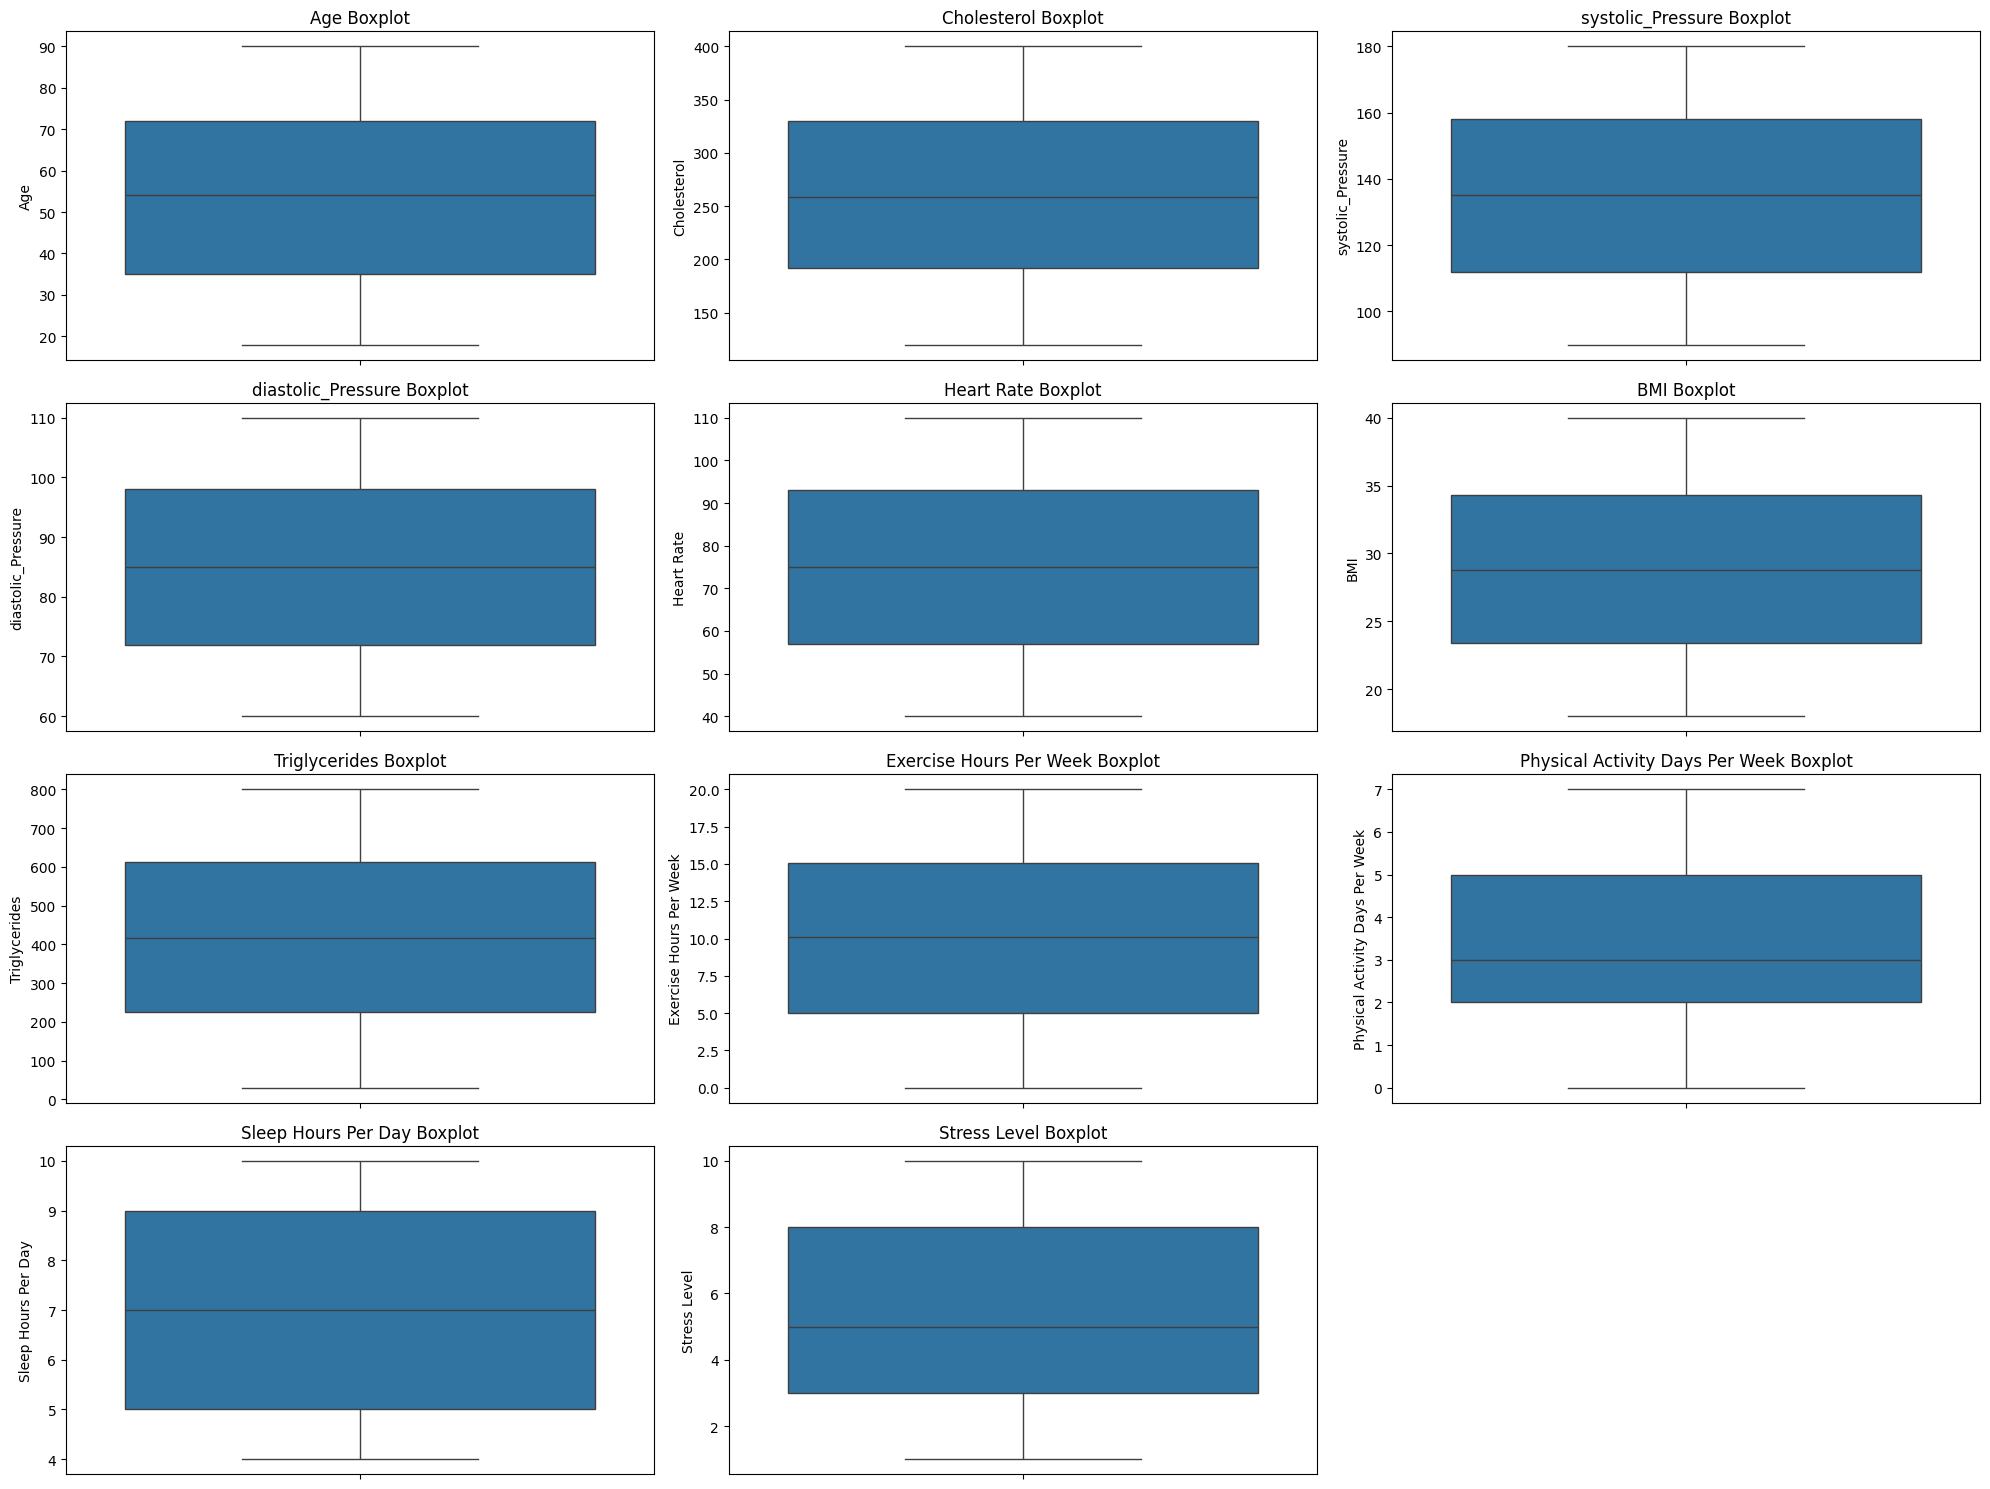

In [ ]:
#kiểm tra giá trị ngoại lệ
# List of numerical features to check for outliers
numerical_features = ['Age', 'Cholesterol', 'systolic_Pressure', 'diastolic_Pressure', 'Heart Rate',
                      'BMI', 'Triglycerides', 'Exercise Hours Per Week',
                      'Physical Activity Days Per Week', 'Sleep Hours Per Day','Stress Level']

# Set up the figure size for better visualization
plt.figure(figsize=(20, 15))

# Loop through each numerical feature and plot a boxplot
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data=data[feature])
    plt.title(f'{feature} Boxplot', fontsize=12)

plt.tight_layout()
plt.show()


**Nhận xét**
* Không có giá trị ngoại lệ đáng kể trong các biến số liên tục đã kiểm tra. Các giá trị đều nằm trong phạm vi hợp lý, không có điểm dữ liệu nào nằm quá xa ngoài phạm vi của biểu đồ hộp

In [ ]:
data.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Heart Attack Risk', 'systolic_Pressure', 'diastolic_Pressure'],
      dtype='object')

In [ ]:
data.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,systolic_Pressure,diastolic_Pressure
0,67,Male,208,72,0,0,1,0,0,4.168189,...,9,6.615001,31.251233,286,0,6,Argentina,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,...,1,4.963459,27.194973,235,1,7,Canada,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,...,9,9.463426,28.176571,587,4,4,France,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,...,9,7.648981,36.464704,378,3,4,Canada,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,...,6,1.514821,21.809144,231,1,5,Thailand,0,91,88


In [ ]:
target_feature = "Heart Attack Risk"
print("Target feature:", target_feature)

Target feature: Heart Attack Risk


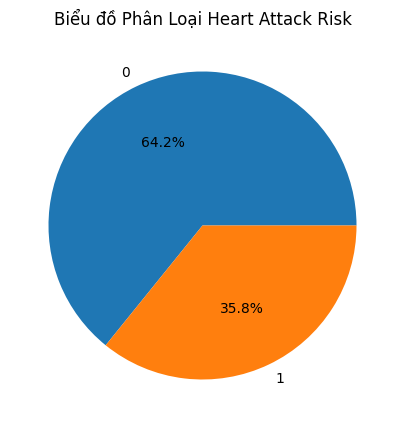

In [ ]:
# Lấy các nhãn từ cột 'Heart Attack Risk'
labels = data['Heart Attack Risk'].value_counts().index

# Vẽ biểu đồ pie
plt.figure(figsize=(5,5))
data['Heart Attack Risk'].value_counts().plot(kind='pie', labels=labels, autopct='%1.1f%%')
plt.title('Biểu đồ Phân Loại Heart Attack Risk')
plt.ylabel('')
plt.show()


##3.4 Trực quan hoá dữ liệu


<Figure size 2000x1500 with 0 Axes>

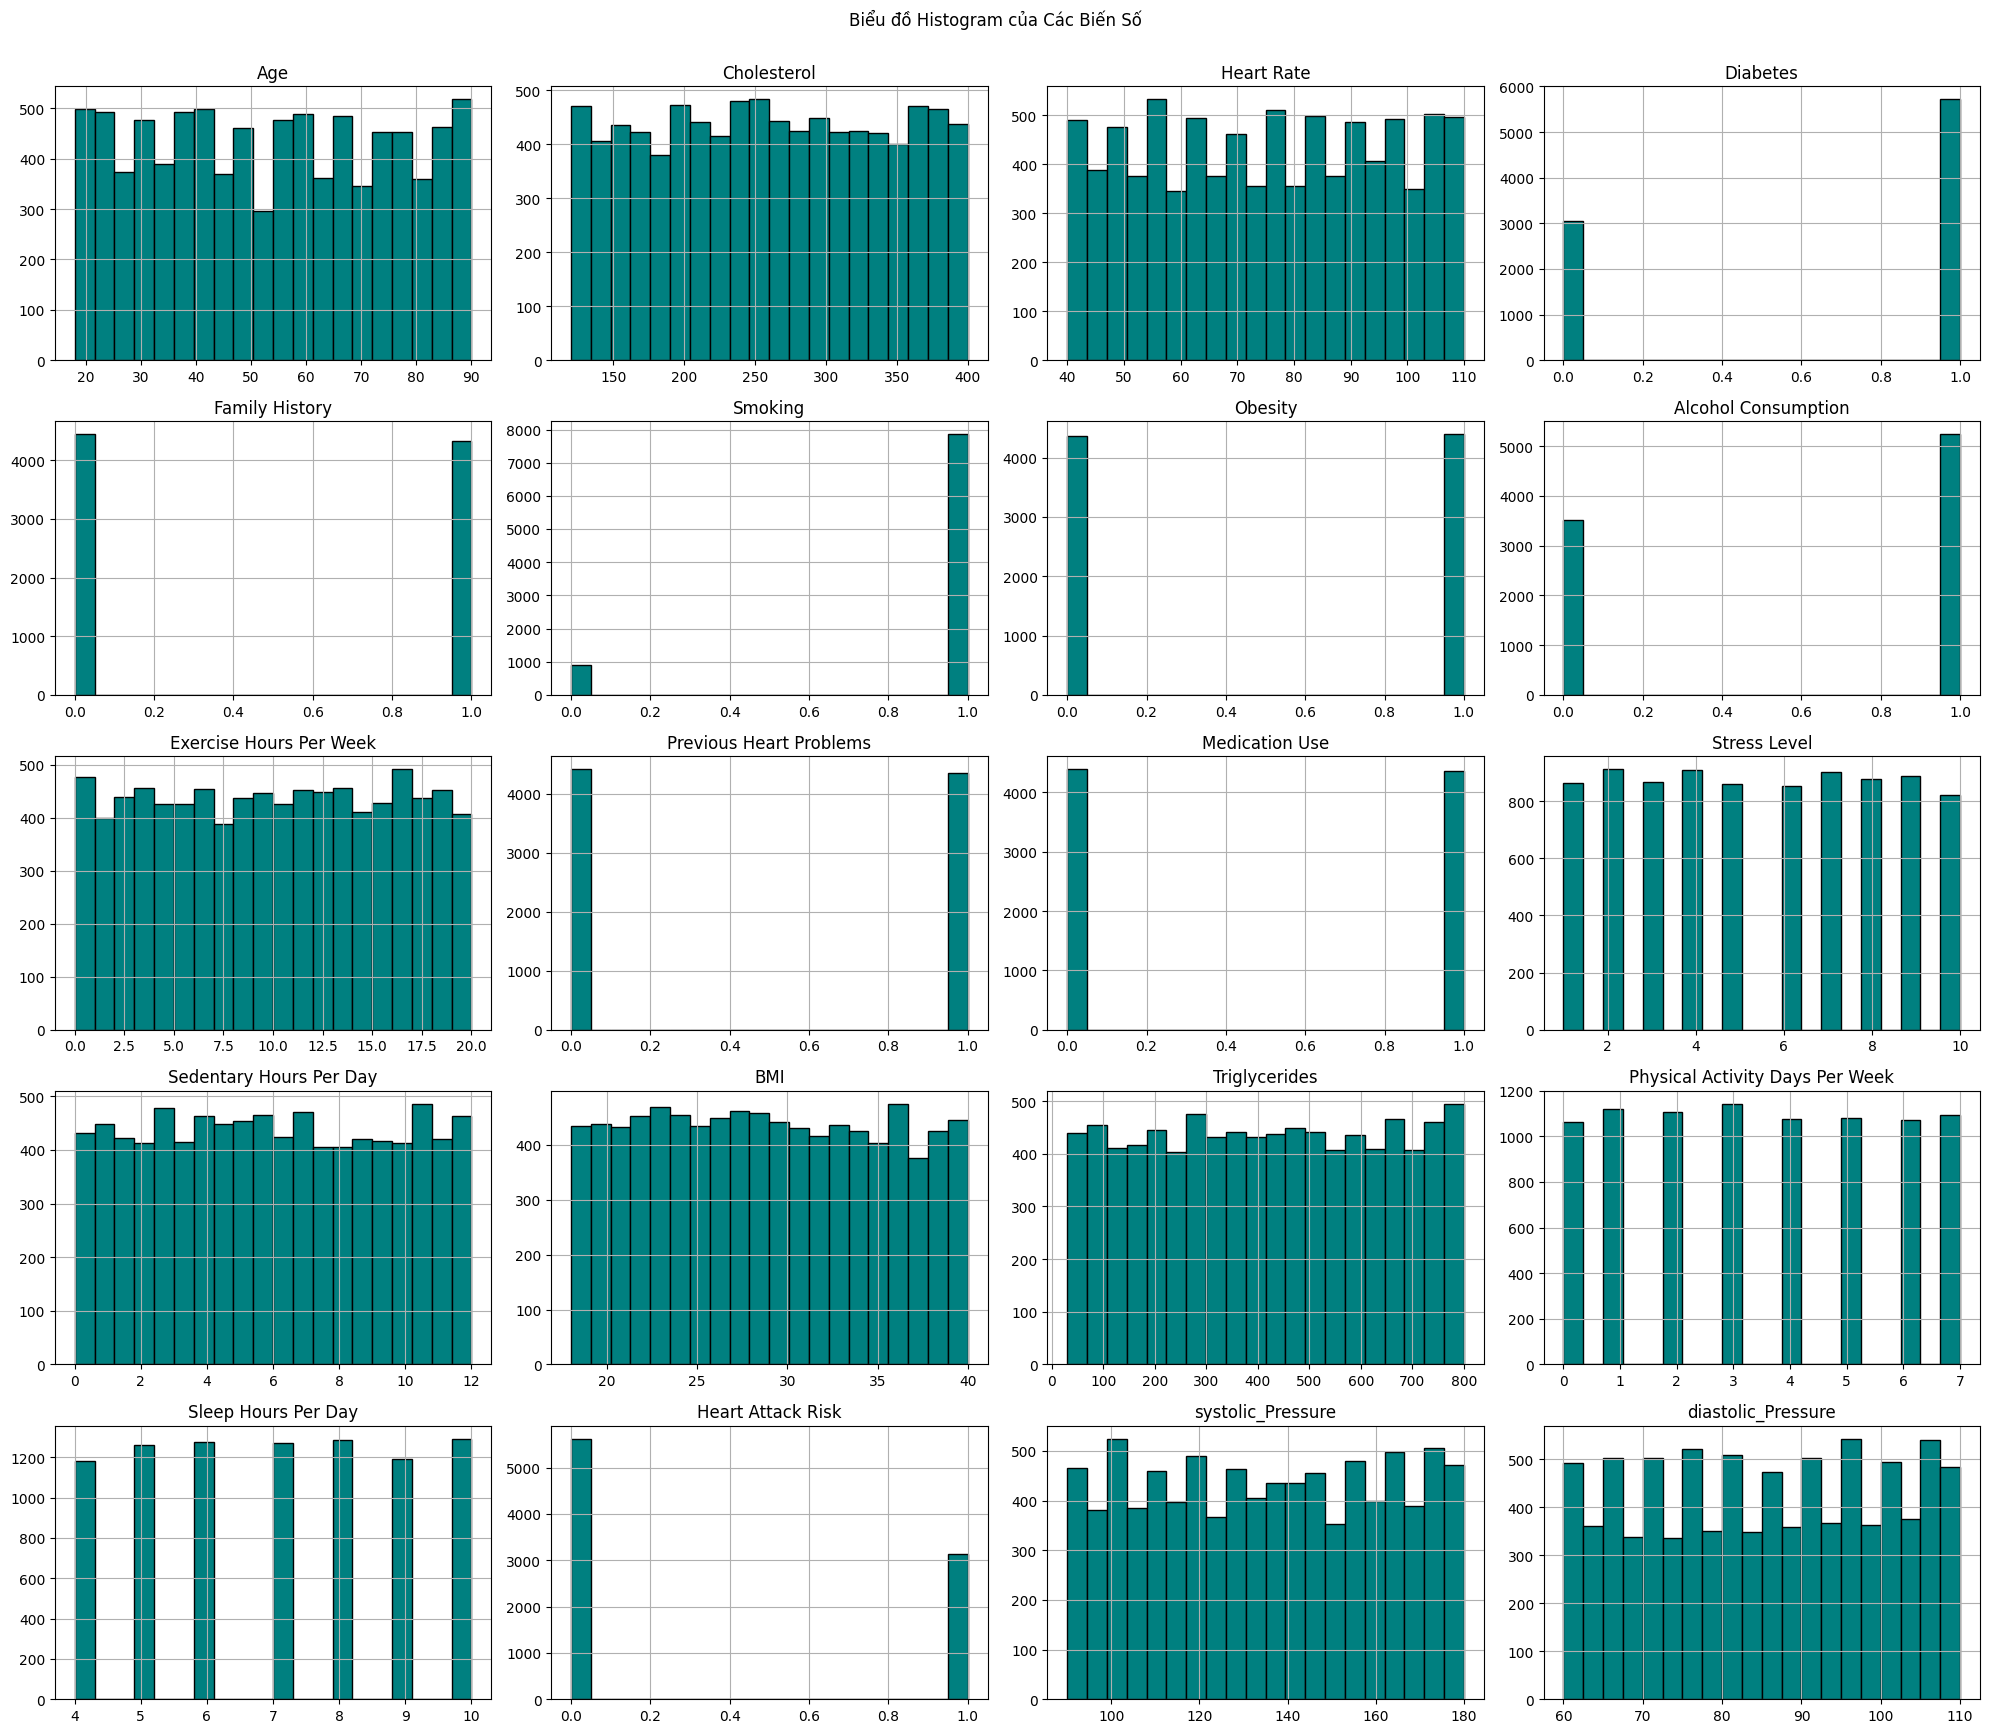

In [ ]:
# xem trực quan hóa phân phối của các biến số
import numpy as np

plt.figure(figsize=(20, 15))
data.select_dtypes(include=[np.number]).hist(bins=20, color='teal', edgecolor='black', figsize=(20, 20), layout=(6, 4))
plt.tight_layout()
plt.suptitle('Biểu đồ Histogram của Các Biến Số', y=1.02)
plt.show()



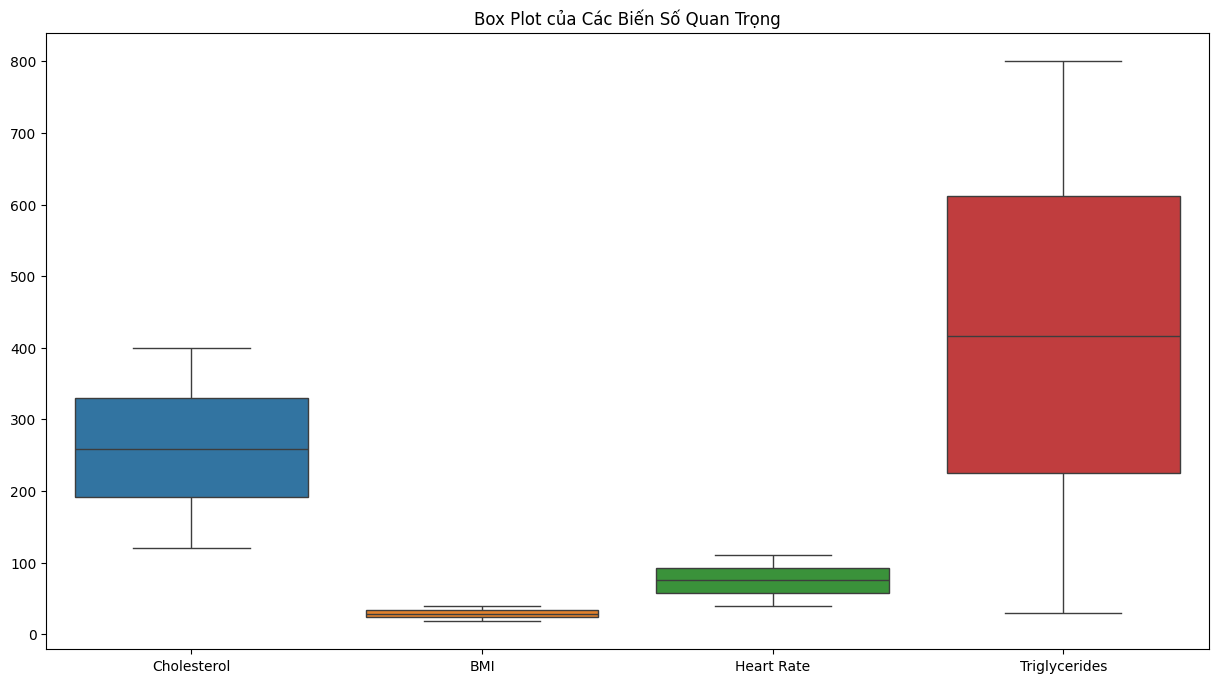

In [ ]:
# Xem giá trị ngoại lệ ở các biến số quan trọng
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[['Cholesterol', 'BMI', 'Heart Rate', 'Triglycerides']])
plt.title('Box Plot của Các Biến Số Quan Trọng')
plt.show()


- Cholesterol và Triglycerides là hai biến có sự phân phối rộng và có thể có tác động lớn hơn đến nguy cơ đau tim
- BMI và Heart Rate có phân phối hẹp và ít giá trị ngoại lệ, cho thấy  ít ảnh hưởng hơn trong phân tích, cần loại bỏ các biến này

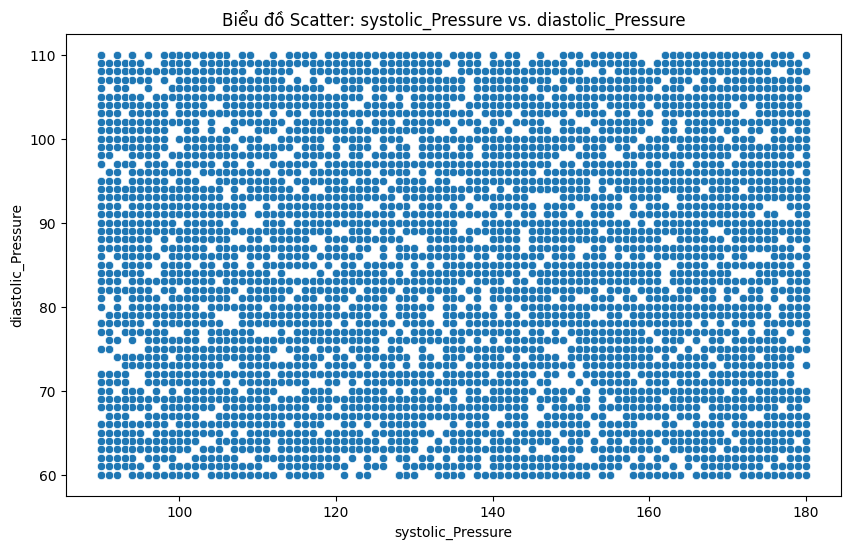

In [ ]:
# Xem  mối quan hệ giữa huyết áp tâm thu và huyết áp tâm trương
plt.figure(figsize=(10, 6))
sns.scatterplot(x='systolic_Pressure', y='diastolic_Pressure', data=data)
plt.title('Biểu đồ Scatter: systolic_Pressure vs. diastolic_Pressure')
plt.show()


- systolic_Pressure và diastolic_Pressure không có mối quan hệ rõ ràng, nên mỗi chỉ số cần được theo dõi riêng để đánh giá sức khỏe tim mạch chính xác hơn.

#4 Tiền xử lý dữ liệu


##4.1 Mã hoá nhãn các biến phân loại

In [ ]:
le = LabelEncoder()

data = data.copy()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

##4.2 Chuẩn Hóa Dữ Liệu Sử Dụng Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_cols])

df_scaled = pd.DataFrame(scaled_data, columns=numeric_cols)

df_scaled.head()


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,systolic_Pressure,diastolic_Pressure
0,0.625557,0.658765,-0.641579,-0.147042,-1.369651,-0.986061,0.339157,-1.002857,-1.219867,-1.010838,...,1.234604,0.179251,0.373454,-0.588539,-1.528843,-0.514750,-1.620793,-0.74709,0.870044,0.193782
1,-1.539322,0.658765,1.596895,1.118179,0.730113,1.014136,0.339157,0.997151,0.819762,-1.418027,...,-1.563129,-0.297225,-0.268479,-0.816487,-1.090738,-0.011823,-1.102536,-0.74709,1.135714,0.534480
2,-1.539322,-1.517992,0.793023,-0.147042,0.730113,-0.986061,-2.948488,-1.002857,-1.219867,-1.372188,...,1.234604,1.001031,-0.113134,0.756800,0.223577,-1.520604,-0.584279,-0.74709,1.477290,0.943319
3,1.425621,0.658765,1.522691,-0.098380,0.730113,1.014136,0.339157,-1.002857,0.819762,-0.032188,...,1.234604,0.477557,1.198524,-0.177339,-0.214528,-1.520604,-1.102536,-0.74709,1.059809,1.011458
4,0.578495,0.658765,0.718820,0.874867,0.730113,1.014136,0.339157,0.997151,-1.219867,-0.727941,...,0.185454,-1.292170,-1.120826,-0.834365,-1.090738,-1.017677,1.143245,-0.74709,-1.672797,0.193782


##4.3 Hệ số tương quan

<Axes: >

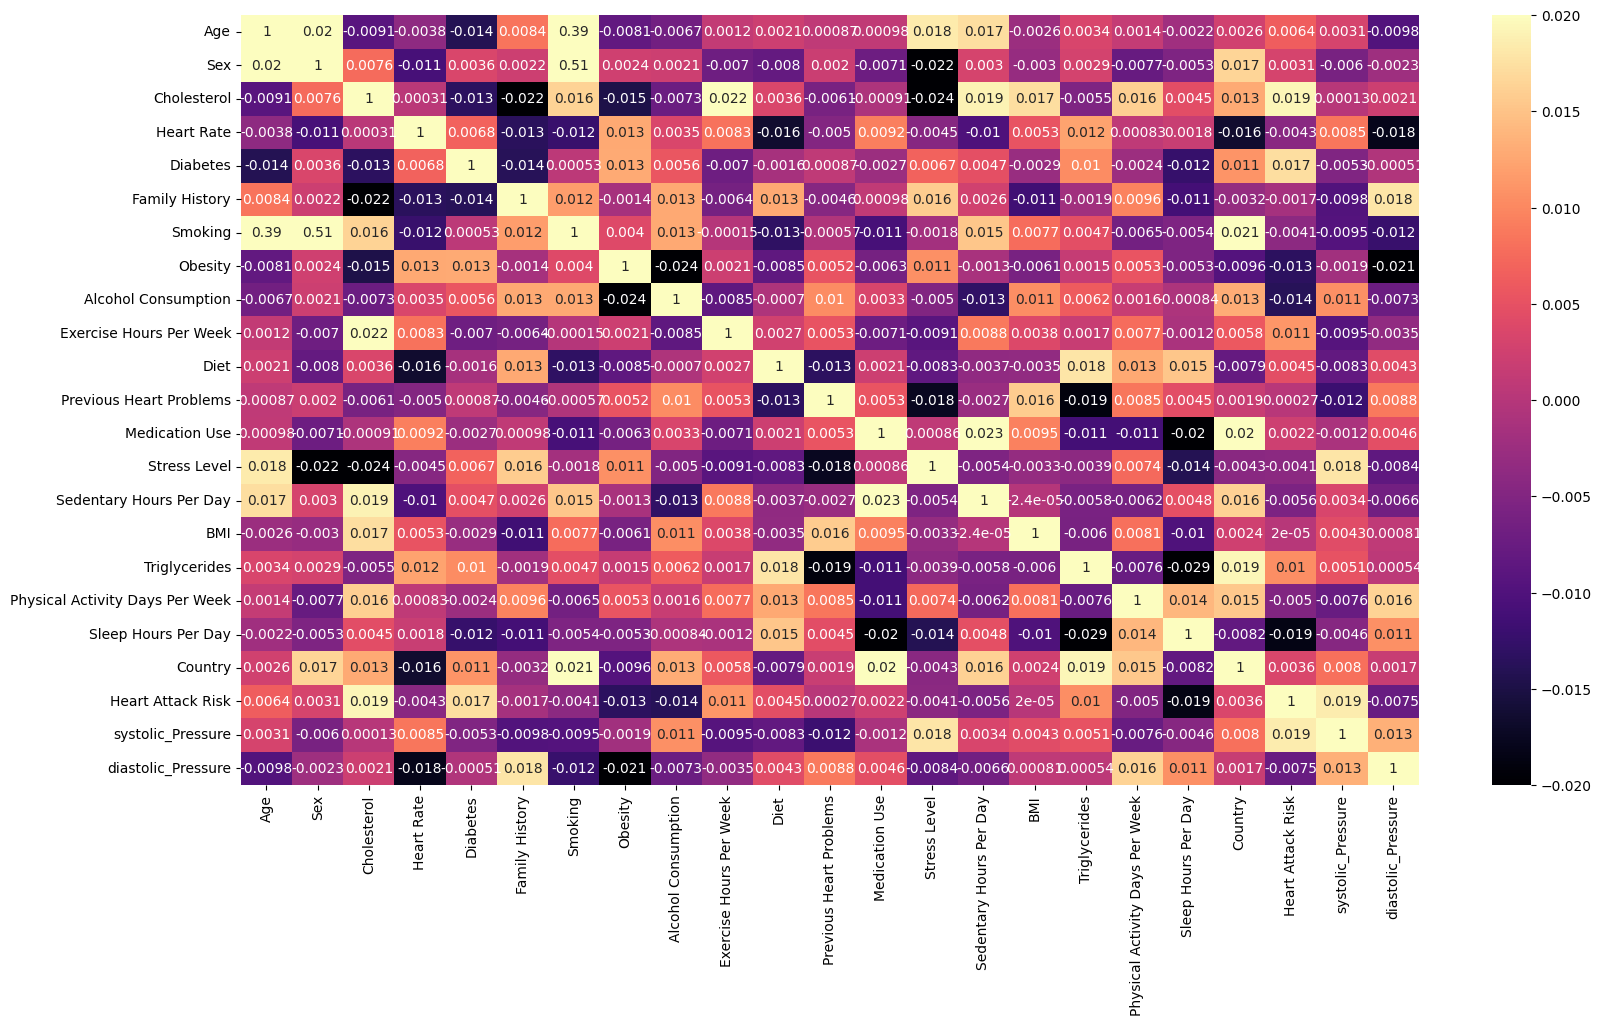

In [ ]:
#HeatMap
plt.figure(figsize = (19,10))
corelation=data.corr()
sns.heatmap(corelation, cmap="magma",annot=True,vmin=-0.0200, vmax=0.0200)

**Nhận xét:**

Từ Heatmap này, chúng ta có thể hiểu rằng Cholesterol, Bệnh tiểu đường, Số giờ tập thể dục mỗi tuần, Triglyceride và huyết áp tâm thu (huyết áp) có liên quan nhiều hơn đến Nguy cơ đau tim so với các đặc điểm khác. BMI và Các vấn đề về tim trước đây có mối tương quan thấp với Nguy cơ đau tim. Do đó, chúng ta có thể loại bỏ chúng.


In [ ]:
# xoá các cột có hệ sôs tương quan thấp
columns_to_drop = ['BMI','Previous Heart Problems']

data.drop(columns_to_drop, axis=1, inplace=True)

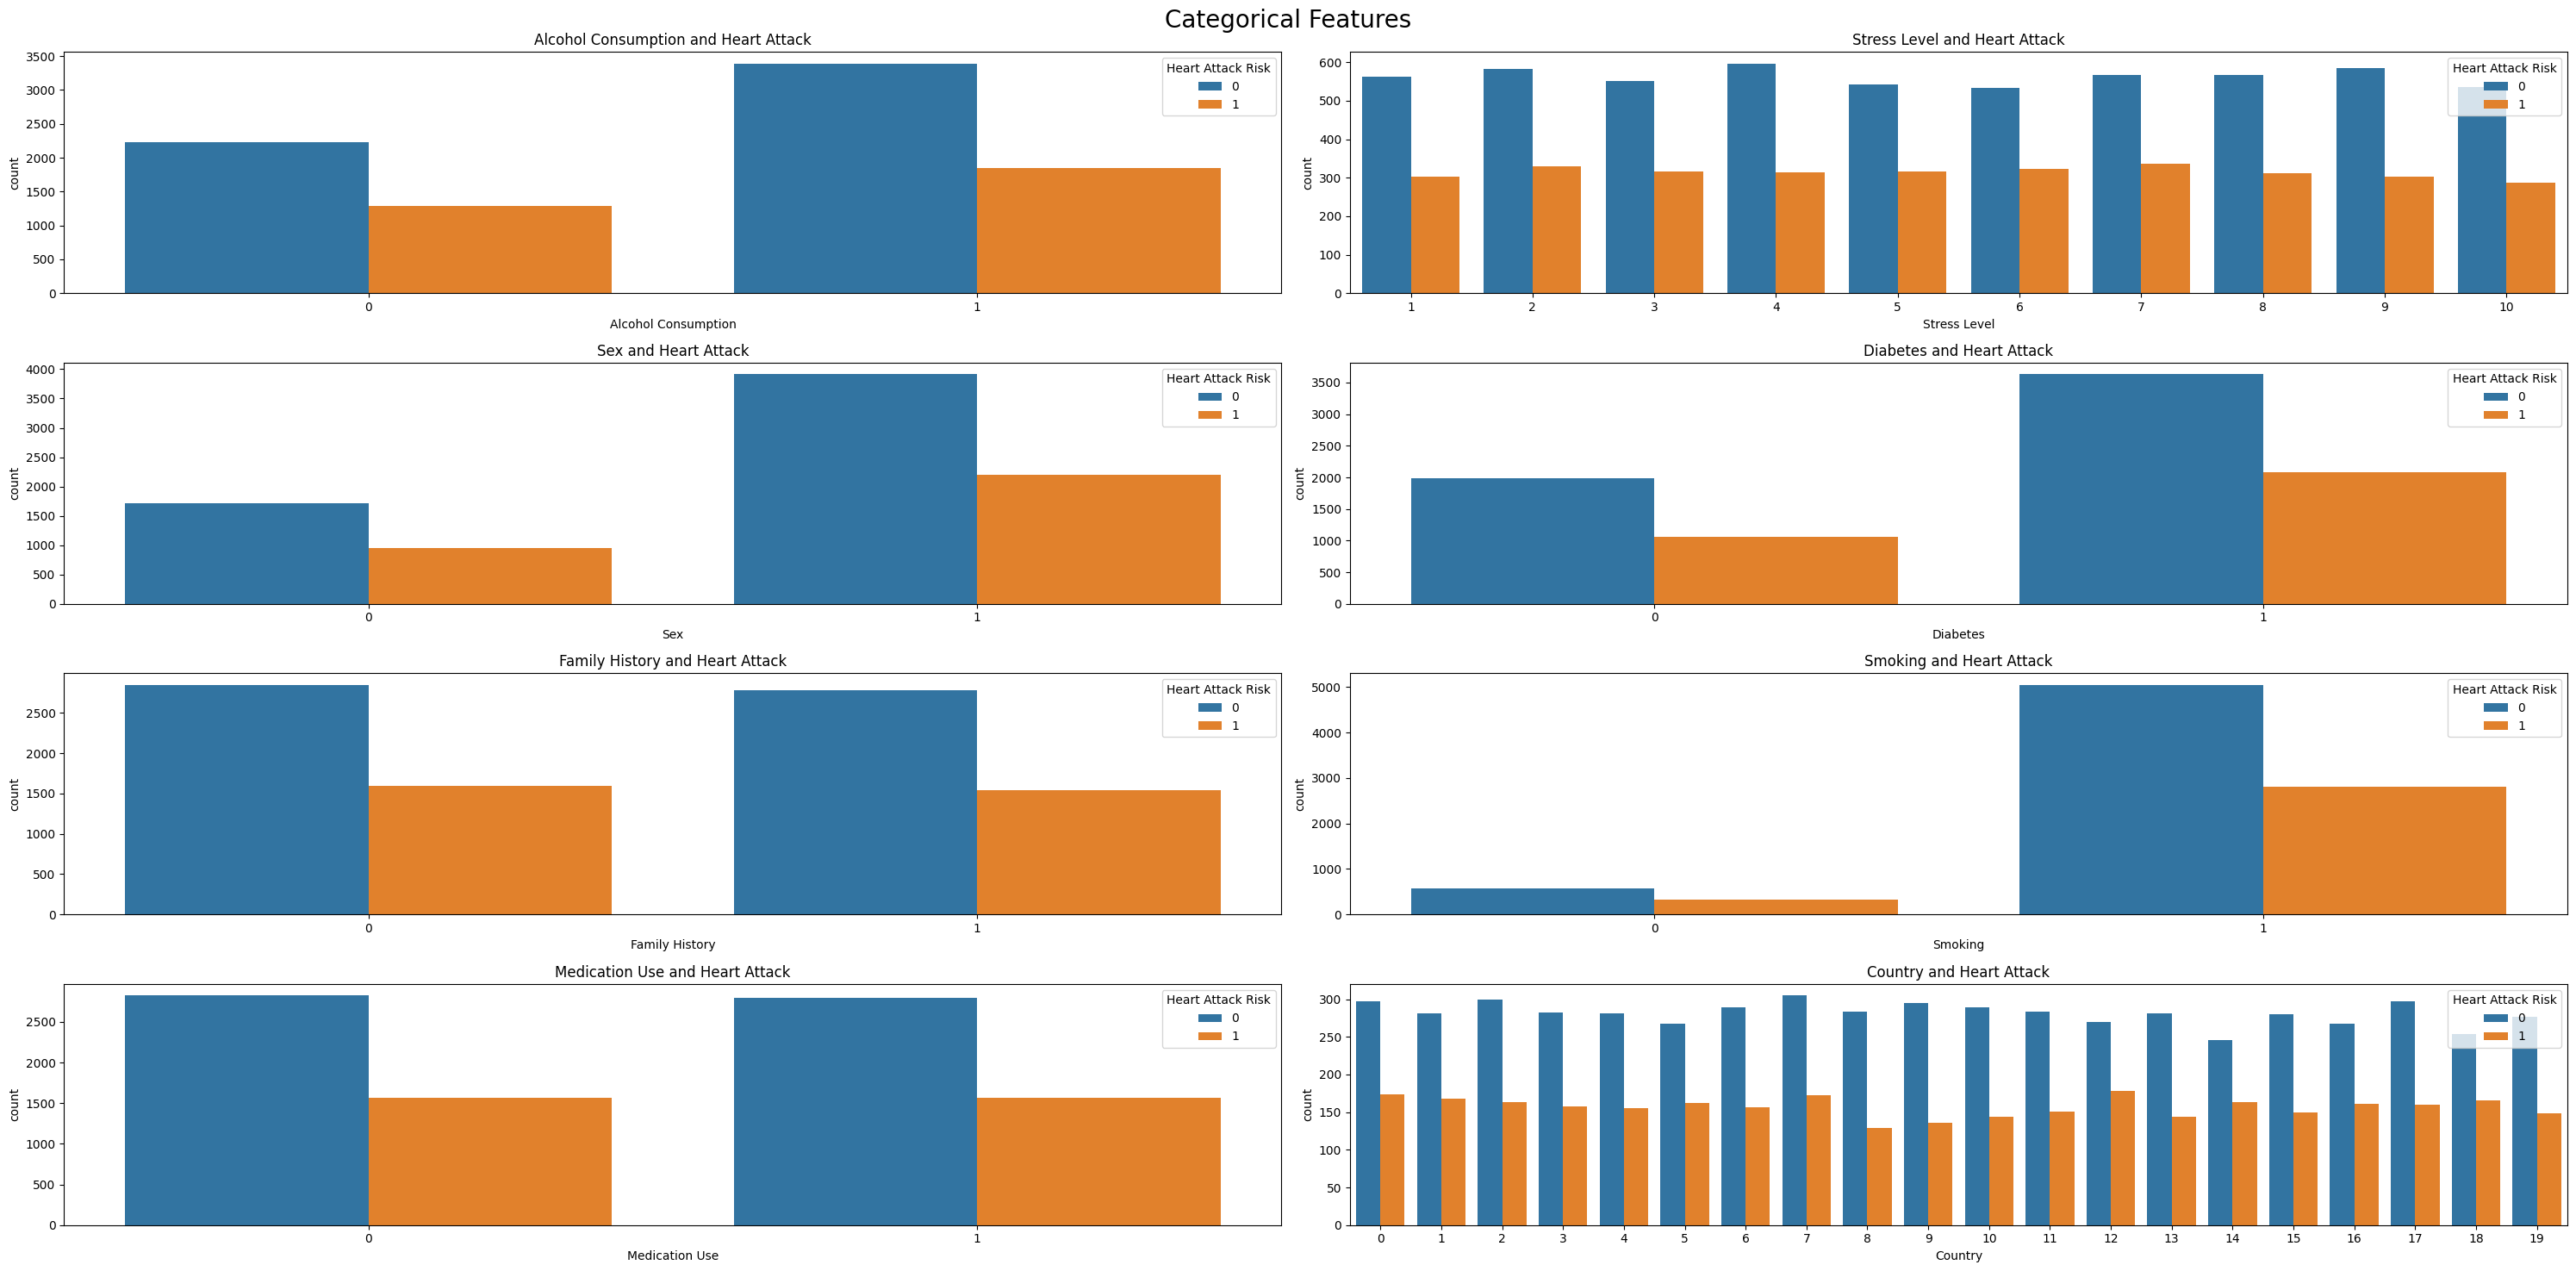

In [ ]:
# biểu đồ phân phối các biến phân loại
plt.figure(figsize=(30, 15))
plt.suptitle('Categorical Features', fontsize=20)

categorical_features2 = ['Alcohol Consumption', 'Stress Level', 'Sex','Diabetes','Family History','Smoking','Medication Use', 'Country']

for i, feature in enumerate(categorical_features2):
    plt.subplot(4, 2, i+1)
    sns.countplot(data=data, x=feature, hue='Heart Attack Risk')
    plt.title(f'{feature} and Heart Attack',fontsize=12)

plt.tight_layout()
plt.show()

**Nhận xét:**

1. **Alcohol Consumption (Tiêu thụ rượu):**  
   Những người  tiêu thụ rượu (`Alcohol Consumption = 1`) có tỷ lệ mắc bệnh đau tim (`Heart Attack Risk = 1`) cao hơn so với những người không tiêu thụ rượu (`Alcohol Consumption = 0`). Tiêu thụ rượu có thể là một yếu tố rủi ro đối với nguy cơ đau tim.

2. **Diet (Chế độ ăn):**  
   Người có chế độ ăn không lành mạnh (`Diet = 0`) có tỷ lệ mắc bệnh đau tim cao hơn.Những người có chế độ ăn trung bình (`Diet = 1`) và lành mạnh (`Diet = 2`) cũng có tỷ lệ mắc bệnh đau tim tương đối cao, cho thấy chế độ ăn uống có ảnh hưởng đến nguy cơ đau tim nhưng không phải là yếu tố quyết định.
3. **Medication Use (Sử dụng thuốc):**  
   Những người sử dụng thuốc (`Medication Use = 1`) có tỷ lệ mắc bệnh đau tim cao hơn so với những người không sử dụng thuốc (`Medication Use = 0`).
4. **Sex (Giới tính):**  
  Người có mã `Sex = 1` (nam) có tỷ lệ nguy cơ đau tim (`Heart Attack Risk = 1`) cao hơn so với người có mã `Sex = 0` (nữ).  Cho thấy nam giới có xu hướng bị đau tim cao hơn so với nữ giới trong tập dữ liệu này.

5. **Diabetes (Bệnh tiểu đường):**  
  Những người có bệnh tiểu đường (`Diabetes = 1`) có tỷ lệ mắc bệnh đau tim cao hơn so với những người không có bệnh tiểu đường (`Diabetes = 0`). Cho thấy  bệnh tiểu đường có thể là yếu tố rủi ro lớn dẫn đến nguy cơ đau tim.

6. **Family History (Lịch sử gia đình):**  
  Những người có lịch sử gia đình mắc bệnh liên quan đến tim (`Family History = 1`) có tỷ lệ mắc bệnh đau tim cao hơn so với những người không có lịch sử gia đình liên quan (`Family History = 0`). Yếu tố di truyền có thể ảnh hưởng lớn đến nguy cơ mắc bệnh tim.

7. **Smoking(Hút thuốc):**  
  Những người hút thuốc (`Smoking = 1`) có tỷ lệ mắc bệnh đau tim cao hơn nhiều so với những người không hút thuốc (`Smoking = 0`). Hút thuốc là yếu tố nguy cơ gây ra các vấn đề về tim mạch.
8. **Stress Level(Mức độ căng thẳng):**  
  Người có mức độ căng thẳng cao hơn (Stress Level từ 6 đến 10) có nguy cơ mắc bệnh đau tim cao hơn so với người có mức độ căng thẳng thấp hơn (Stress Level từ 1 đến 5).


#4.3 Xử lý Mất Cân Bằng Dữ Liệu

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

random_over_sampler = RandomOverSampler(sampling_strategy=1)

y = data['Heart Attack Risk']
X = data.drop(['Heart Attack Risk'],axis=1)

X , y = random_over_sampler.fit_resample(X,y)

scaler = MinMaxScaler()
X_min_max = pd.DataFrame(scaler.fit_transform(X))


print(pd.DataFrame(y).describe())

       Heart Attack Risk
count       11248.000000
mean            0.500000
std             0.500022
min             0.000000
25%             0.000000
50%             0.500000
75%             1.000000
max             1.000000


**Nhận xét:**

1. **Count (Số lượng quan sát):**  
   Có 11,248 quan sát trong bộ dữ liệu. Đây là số lần đo lường hoặc số bệnh nhân được ghi nhận về nguy cơ bị đau tim.

2. **Mean (Giá trị trung bình):**  
   Trung bình của các nguy cơ bị đau tim là 0.5. Điều này có nghĩa là tỷ lệ nguy cơ trung bình trong bộ dữ liệu là 50%.
3. **Std (Độ lệch chuẩn):**  
   Độ lệch chuẩn là 0.500022, cho biết mức độ phân tán của dữ liệu xung quanh giá trị trung bình. Độ lệch chuẩn gần với 0.5 cho thấy có sự phân tán tương đối đồng đều giữa các giá trị nguy cơ.
4. **Min (Giá trị nhỏ nhất):**  
  Giá trị nguy cơ thấp nhất là 0, nghĩa là một số người không có nguy cơ bị đau tim.

5. **D25% (Phân vị thứ nhất):**  
  25% của các giá trị có nguy cơ từ 0 trở xuống.

6. **50% (Phân vị thứ hai - Median/Trung vị):**  
  Trung vị của bộ dữ liệu là 0.5, có nghĩa là 50% giá trị nằm dưới 0.5 và 50% giá trị nằm trên 0.5.

7. **75% (Phân vị thứ ba):**  
  75% giá trị của nguy cơ nằm dưới 1, có nghĩa là đa số nguy cơ bị đau tim dưới 100%.
8. **Max (Giá trị lớn nhất):**  
  Giá trị nguy cơ cao nhất là 1, tương ứng với những người có nguy cơ bị đau tim cao


In [ ]:
balanced_df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

<Axes: ylabel='count'>

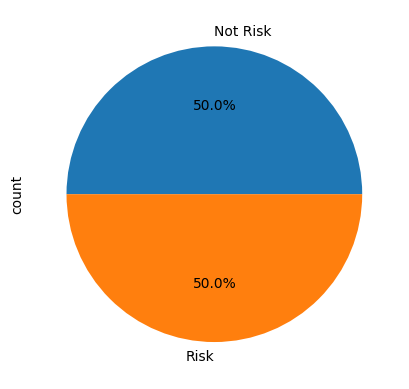

In [ ]:
balanced_df['Heart Attack Risk'].value_counts().plot(kind='pie', labels=['Not Risk', 'Risk'], autopct='%1.1f%%')

**Nhận xét:**

1.
   50% nguy cơ: Một nửa dân số trong tập dữ liệu được phân vào nhóm có nguy cơ đau tim.

2. 50% không nguy cơ: Nửa còn lại thuộc nhóm không có nguy cơ đau tim.

In [ ]:
balanced_df['Heart Attack Risk'].value_counts()

,count
Heart Attack Risk,
0,5624
1,5624


In [ ]:
balanced_df.describe()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Medication Use,Stress Level,Sedentary Hours Per Day,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,systolic_Pressure,diastolic_Pressure,Heart Attack Risk
count,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,...,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000
mean,53.636469,0.697991,261.196835,74.990754,0.653894,0.495821,0.896248,0.504979,0.594683,10.052589,...,0.500356,5.459104,5.998810,418.409317,3.472973,7.010757,9.417852,135.388514,85.024449,0.500000
std,21.330741,0.459150,80.636437,20.557775,0.475749,0.500005,0.304952,0.499997,0.490975,5.789360,...,0.500022,2.847931,3.478464,224.908847,2.288357,1.981817,5.783551,26.368021,14.639530,0.500022
min,18.000000,0.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,...,0.000000,1.000000,0.001263,30.000000,0.000000,4.000000,0.000000,90.000000,60.000000,0.000000
25%,35.000000,0.000000,193.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.014572,...,0.000000,3.000000,2.967329,223.000000,1.000000,5.000000,4.000000,112.000000,72.000000,0.000000
50%,54.000000,1.000000,260.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.145679,...,1.000000,5.000000,5.936919,418.000000,3.000000,7.000000,9.000000,135.000000,85.000000,0.500000
75%,72.000000,1.000000,331.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.107035,...,1.000000,8.000000,9.019745,615.000000,5.000000,9.000000,14.000000,159.000000,98.000000,1.000000
max,90.000000,1.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,...,1.000000,10.000000,11.999313,800.000000,7.000000,10.000000,19.000000,180.000000,110.000000,1.000000


#5 Lựa chọn thuật toán phù hợp

Thực hiện chuẩn hóa cho thuật toán **Logistic Regression** bởi vì **Logistic Regression** phụ thuộc vào khoảng cách giữa các điểm dữ liệu và ranh giới quyết định (decision boundary), do đó việc chuẩn hóa giúp các đặc trưng có trọng số tương đương và tránh việc một đặc trưng chi phối quá trình học.

Đối với hai thuật toán còn lại không cần chuẩn hóa vì nó không sử dụng đến khoảng cách giữa các điểm dữ liệu.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu với Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##5.1 Thuật toán Logistic Regression

**Logistic Regression** là một thuật toán phân loại nhị phân phổ biến, dùng để dự đoán xác suất của một sự kiện có hai kết quả (0 hoặc 1). Thuật toán này áp dụng hàm sigmoid để biến đổi một tổ hợp tuyến tính của các đặc trưng thành một xác suất từ 0 đến 1. Trong bài toán dự đoán nhồi máu cơ tim, Logistic Regression có thể giúp dự đoán xem một người có nguy cơ mắc nhồi máu cơ tim hay không dựa trên các yếu tố sức khỏe như tuổi, giới tính, mức cholesterol, huyết áp, nhịp tim, v.v.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = logistic_model.predict(X_test)


Chúng ta có thể thấy rằng biến logistic_model là một mô hình Logistic Regression đã được huấn luyện trên các biến X_train và y_train. Huấn luyện mô hình có nghĩa là chúng ta đang tìm các trọng số (weights) tốt nhất cho các biến đầu vào, sao cho mô hình có thể dự đoán xác suất chính xác của sự kiện nhị phân (có nguy cơ hoặc không). Để thực hiện dự đoán, chúng ta sẽ sử dụng **hàm predict()**.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
import numpy as np
mae_linear = np.round(metrics.mean_absolute_error(y_test, y_pred_lr))
mse_linear = np.round(metrics.mean_squared_error(y_test, y_pred_lr))
rmse_linear = np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
accuracy = np.round(accuracy_score(y_test, y_pred_lr), 2)

print('Accuracy (Độ chính xác):', accuracy)
print('Mean Absolute Error:', mae_linear, 2)
print('Mean Squared Error:', mse_linear, 2)
print('Root Mean Squared Error:', rmse_linear, 2)

Accuracy (Độ chính xác): 0.5
Mean Absolute Error: 0.0 2
Mean Squared Error: 0.0 2
Root Mean Squared Error: 1.0 2


In [ ]:
import pandas as pd
lr_frame = pd.DataFrame({"Y_test": y_test, "Y_pred": y_pred_lr})
print(lr_frame.head(10))


      Y_test  Y_pred
5748       0       1
7334       1       1
5931       0       0
3819       0       1
6394       0       1
7040       0       0
1068       0       1
4881       1       0
668        0       0
6553       1       0


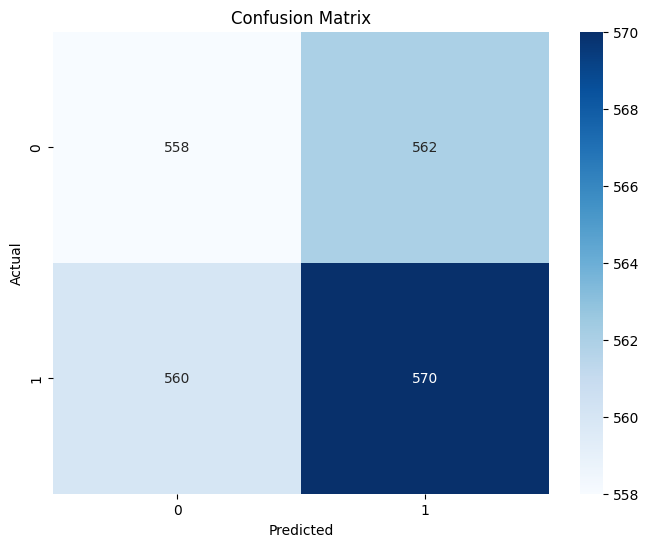

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)

# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Nhìn ma trận nhầm lẫn ta có thể thấy mô hình cho ra độ chính xác kém hiệu quả.

##5.2 Thuật toán DecisionTreeClassifier

DecisionTreeClassifier là một thuật toán phân loại học có giám sát, hoạt động bằng cách chia dữ liệu thành các nhánh dựa trên các đặc trưng để tối ưu hóa việc phân loại. Nó dễ hiểu và trực quan, có khả năng xử lý cả dữ liệu số và phân loại. Tuy nhiên, thuật toán này dễ bị overfitting và có thể không ổn định khi dữ liệu thay đổi nhỏ.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

classifier_tree = DecisionTreeClassifier(random_state=42)
classifier_tree.fit(X_train, y_train)

y_pred_tree = classifier_tree.predict(X_test)

In [ ]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print('Accuracy:', accuracy_tree)
print('Precision:', precision_tree)
print('Recall:', recall_tree)
print('F1-Score:', f1_tree)

Accuracy: 0.6915555555555556
Precision: 0.6636636636636637
Recall: 0.7823008849557522
F1-Score: 0.7181153533712429


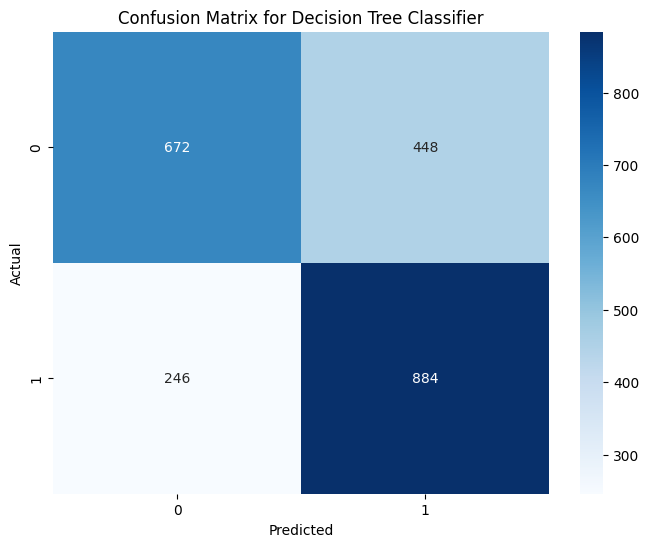

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_tree = classifier_tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


Tunning

In [ ]:

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

classifier_tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=classifier_tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

Best parameters found: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
y_pred_tree_cv = grid_search.predict(X_test)

accuracy_tree_cv = accuracy_score(y_test, y_pred_tree_cv)
precision_tree_cv = precision_score(y_test, y_pred_tree_cv)
recall_tree_cv = recall_score(y_test, y_pred_tree_cv)
f1_tree_cv = f1_score(y_test, y_pred_tree_cv)

print(f"Accuracy: {accuracy_tree_cv}")
print(f"Precision: {precision_tree_cv}")
print(f"Recall: {recall_tree_cv}")
print(f"F1 Score: {f1_tree_cv}")

Accuracy: 0.6777777777777778
Precision: 0.6498889711324944
Recall: 0.7769911504424779
F1 Score: 0.7077791213220476


Bởi vì sau khi điều chỉnh, các giá trị không thay đổi, do đó chúng ta có thể lấy bất kỳ mô hình nào.

In [ ]:
regressor_tree_frame_cv = pd.DataFrame({"Y_test": y_test, "Y_pred": y_pred_tree_cv})
print("DecisionTreeClassifier:")
print(regressor_tree_frame_cv.head(10))

DecisionTreeClassifier:
      Y_test  Y_pred
5748       0       1
7334       1       1
5931       0       0
3819       0       0
6394       0       0
7040       0       1
1068       0       1
4881       1       0
668        0       0
6553       1       1


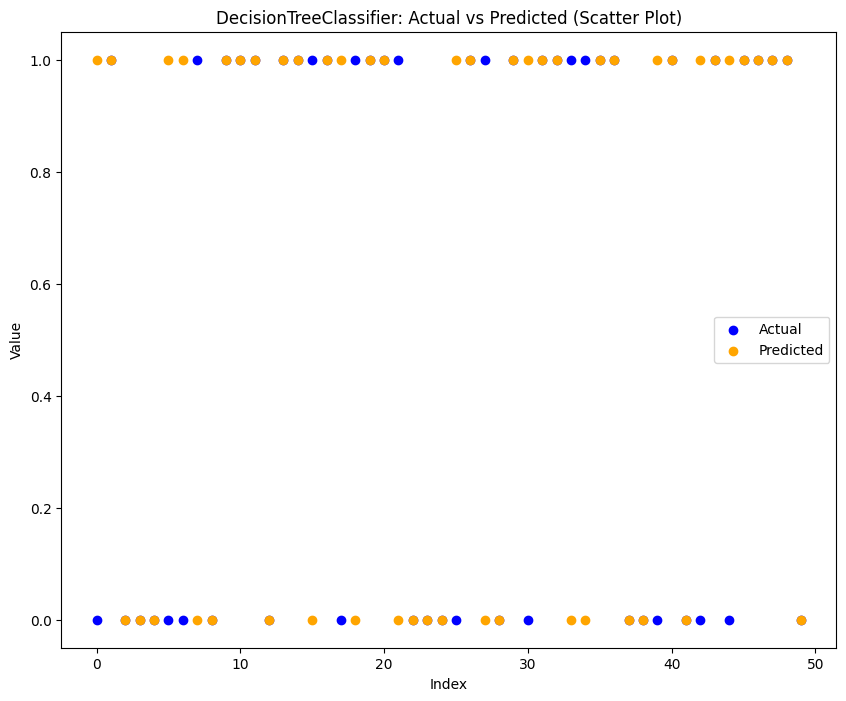

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(range(len(regressor_tree_frame_cv[:50])), regressor_tree_frame_cv["Y_test"][:50], color='blue', label='Actual')
plt.scatter(range(len(regressor_tree_frame_cv[:50])), regressor_tree_frame_cv["Y_pred"][:50], color='orange', label='Predicted')
plt.title("DecisionTreeClassifier: Actual vs Predicted (Scatter Plot)")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()


##5.3 Thuật toán RandomForestClassifier

RandomForestClassifier là một thuật toán phân loại thuộc nhóm ensemble learning, được phát triển từ các cây quyết định (Decision Tree). Nó hoạt động bằng cách tạo ra nhiều cây quyết định độc lập, mỗi cây được huấn luyện trên các mẫu ngẫu nhiên từ dữ liệu và các tập con ngẫu nhiên của các đặc trưng.


*   Bagging (Bootstrap Aggregating): Mỗi cây được huấn luyện trên các mẫu ngẫu nhiên từ tập dữ liệu.
*   Random Subset of Features: Tại mỗi lần chia nhánh trong cây, chỉ một số đặc trưng ngẫu nhiên được xem xét để giảm sự tương quan giữa các cây.
Phân loại cuối cùng: Kết quả phân loại được xác định bằng cách lấy kết quả theo số phiếu bầu từ tất cả các cây (voting).




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

classifier_rf = RandomForestClassifier(random_state=42)
classifier_rf.fit(X_train, y_train)
y_pred_forest = classifier_rf.predict(X_test)



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_forest)
precision = precision_score(y_test, y_pred_forest)
recall = recall_score(y_test, y_pred_forest)
f1 = f1_score(y_test, y_pred_forest)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.7902222222222223
Precision: 0.8463157894736842
Recall: 0.7115044247787611
F1 Score: 0.7730769230769231


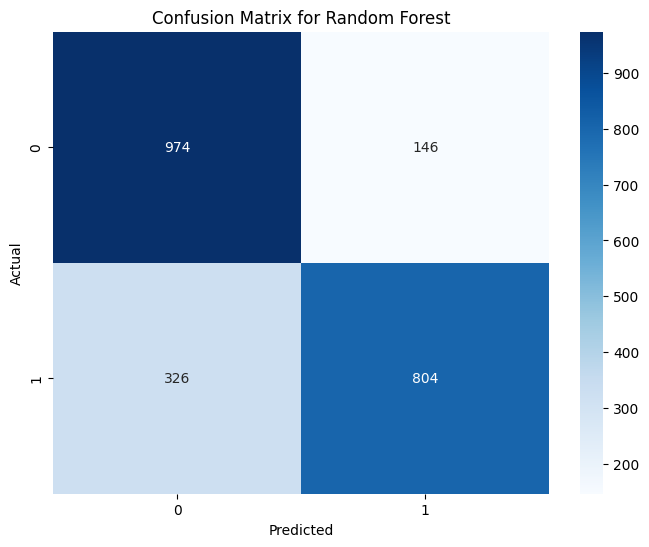

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_forest)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()


**Tunning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import joblib


param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:

rf_model = grid_search.best_estimator_

joblib.dump(rf_model, 'rf_model.pkl')
y_pred_forest_cv = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_forest_cv)
classification_rep = classification_report(y_test, y_pred_forest_cv)
cm = confusion_matrix(y_test, y_pred_forest_cv)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.7657777777777778
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      1120
           1       0.81      0.70      0.75      1130

    accuracy                           0.77      2250
   macro avg       0.77      0.77      0.76      2250
weighted avg       0.77      0.77      0.76      2250

Confusion Matrix:
[[929 191]
 [336 794]]


Vì sau khi điều chỉnh, các giá trị vẫn được giữa nguyên cho thấy mô hình ban đầu đã tốt

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

regressor_rf_frame_cv = pd.DataFrame({"Y_test": y_test, "Y_pred": y_pred_forest_cv})
print("RandomForestClassifier:")
print(regressor_rf_frame_cv.head(10))

RandomForestClassifier:
      Y_test  Y_pred
5748       0       0
7334       1       1
5931       0       0
3819       0       1
6394       0       0
7040       0       0
1068       0       1
4881       1       0
668        0       0
6553       1       1


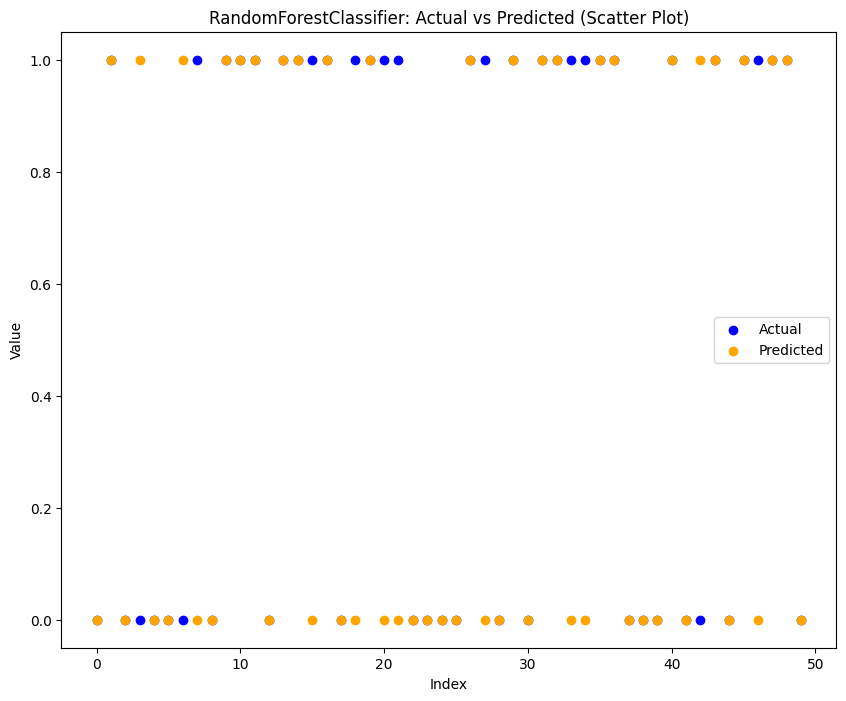

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(range(len(regressor_rf_frame_cv[:50])), regressor_rf_frame_cv["Y_test"][:50], color='blue', label='Actual')
plt.scatter(range(len(regressor_rf_frame_cv[:50])), regressor_rf_frame_cv["Y_pred"][:50], color='orange', label='Predicted')

plt.title("RandomForestClassifier: Actual vs Predicted (Scatter Plot)")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()


#6. Mô hình đánh giá

In [ ]:
!pip install tabulate

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tabulate import tabulate

results_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE'])

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
results_df = pd.concat([results_df, pd.DataFrame({'Model': ['Logistic Regression'], 'MAE': [f'{mae_lr:.2f}'], 'MSE': [f'{mse_lr:.2f}'], 'RMSE': [f'{rmse_lr:.2f}']})], ignore_index=True)

mae_rf = mean_absolute_error(y_test, y_pred_forest)
mse_rf = mean_squared_error(y_test, y_pred_forest)
rmse_rf = np.sqrt(mse_rf)
results_df = pd.concat([results_df, pd.DataFrame({'Model': ['Random Forest'], 'MAE': [f'{mae_rf:.2f}'], 'MSE': [f'{mse_rf:.2f}'], 'RMSE': [f'{rmse_rf:.2f}']})], ignore_index=True)

mae_tree = mean_absolute_error(y_test, y_pred_tree_cv)
mse_tree = mean_squared_error(y_test, y_pred_tree_cv)
rmse_tree = np.sqrt(mse_tree)
results_df = pd.concat([results_df, pd.DataFrame({'Model': ['Decision Tree'], 'MAE': [f'{mae_tree:.2f}'], 'MSE': [f'{mse_tree:.2f}'], 'RMSE': [f'{rmse_tree:.2f}']})], ignore_index=True)

print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))


╒════╤═════════════════════╤═══════╤═══════╤════════╕
│    │ Model               │   MAE │   MSE │   RMSE │
╞════╪═════════════════════╪═══════╪═══════╪════════╡
│  0 │ Logistic Regression │  0.5  │  0.5  │   0.71 │
├────┼─────────────────────┼───────┼───────┼────────┤
│  1 │ Random Forest       │  0.21 │  0.21 │   0.46 │
├────┼─────────────────────┼───────┼───────┼────────┤
│  2 │ Decision Tree       │  0.32 │  0.32 │   0.57 │
╘════╧═════════════════════╧═══════╧═══════╧════════╛


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tabulate import tabulate

metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

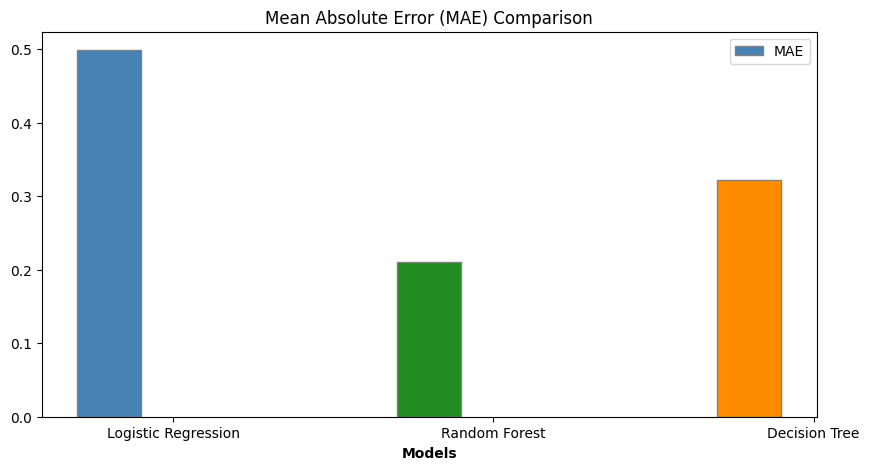

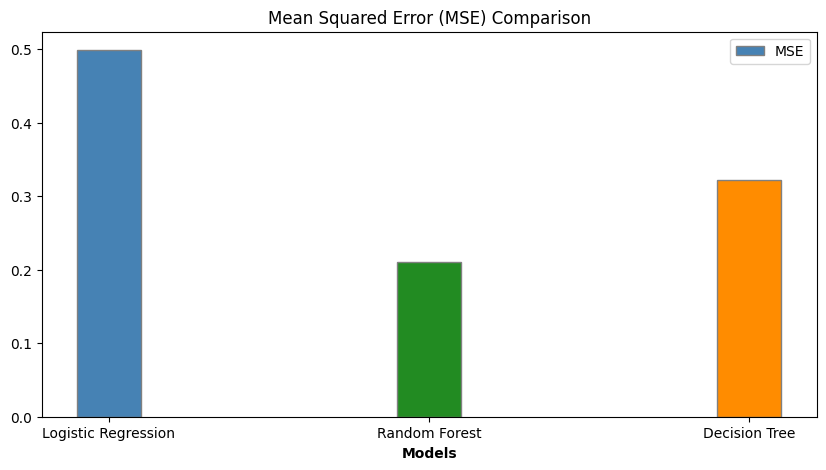

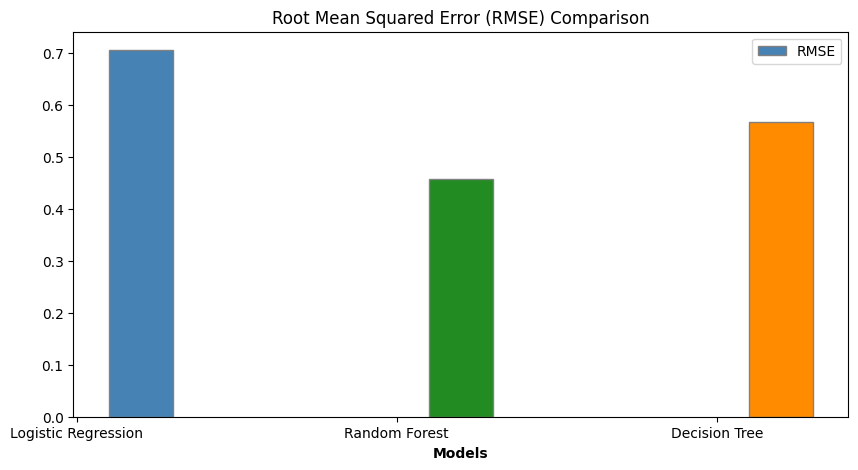

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
mae_values = [mae_lr, mae_rf, mae_tree]
mse_values = [mse_lr, mse_rf, mse_tree]
rmse_values = [rmse_lr, rmse_rf, rmse_tree]

colors = ['steelblue', 'forestgreen', 'darkorange']

bar_width = 0.2

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 5))
plt.bar(r1, mae_values, color=colors, width=bar_width, edgecolor='grey', label='MAE')
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.title('Mean Absolute Error (MAE) Comparison')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(r2, mse_values, color=colors, width=bar_width, edgecolor='grey', label='MSE')
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.title('Mean Squared Error (MSE) Comparison')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(r3, rmse_values, color=colors, width=bar_width, edgecolor='grey', label='RMSE')
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.legend()
plt.show()






**Kết quả: mô hình nào là tốt nhất?**

Nhận xét:

1. Random Forest có sai số trung bình nhỏ hơn trong cả ba chỉ số, cho thấy khả năng dự đoán tốt hơn và ổn định hơn so với các mô hình khác.

2. Logistic Regression không phù hợp với dữ liệu và có sai số lớn hơn so với hai mô hình còn lại.

3. Decision Tree tuy đưa ra kết quả tốt hơn Logistic Regression nhưng vẫn có độ chênh lệch lớn so với Random Forest.

**Vậy, Random Forest là mô hình tốt nhất**

##6.1 Phân tích tầm quan trọng của các biến số ảnh hưởng đén đau tim

                            Feature  Importance
14                    Triglycerides    0.096388
13          Sedentary Hours Per Day    0.095216
9           Exercise Hours Per Week    0.094976
2                       Cholesterol    0.090832
0                               Age    0.083486
18              Sleep Hours Per Day    0.081862
3                        Heart Rate    0.081096
19                              BMI    0.076893
17  Physical Activity Days Per Week    0.063042
12                     Stress Level    0.051229
15                systolic_Pressure    0.045607
16               diastolic_Pressure    0.040579
10                             Diet    0.022290
8               Alcohol Consumption    0.012214
7                           Obesity    0.011998
5                    Family History    0.011821
11                   Medication Use    0.011737
1                               Sex    0.011266
4                          Diabetes    0.011080
6                           Smoking    0

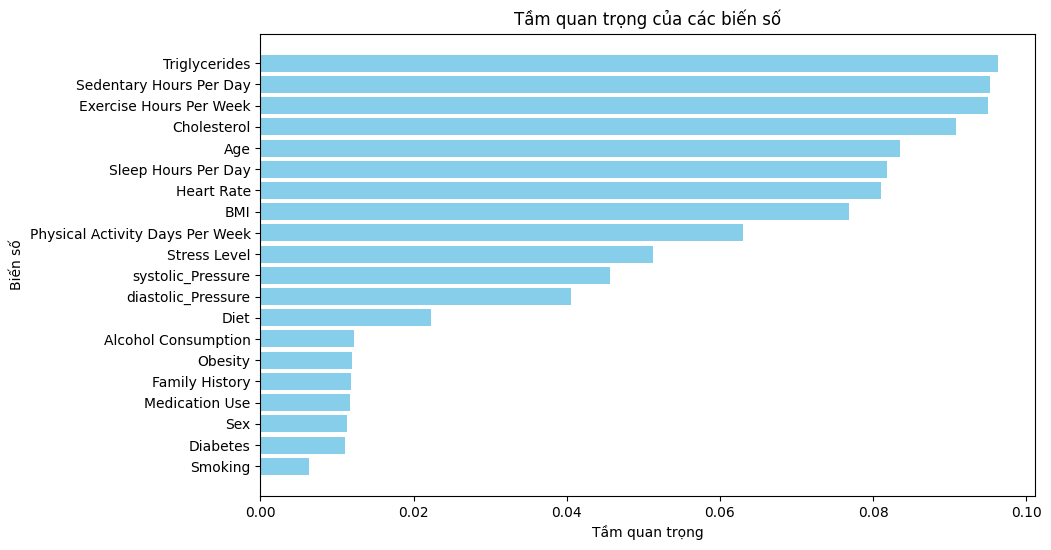

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feature_names = ['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking',
                 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Medication Use',
                 'Stress Level', 'Sedentary Hours Per Day', 'Triglycerides', 'systolic_Pressure',
                 'diastolic_Pressure', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'BMI']

importances = rf_model.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Tầm quan trọng')
plt.ylabel('Biến số')
plt.title('Tầm quan trọng của các biến số')
plt.gca().invert_yaxis()
plt.show()


##6.1 Phân tích phần trăm bệnh nhân có nguy cơ đau tim dựa trên dữ liệu thực tế

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

random_data = {
    'Age': np.random.randint(30, 80, num_samples),
    'Sex': np.random.choice([0, 1], num_samples),
    'Cholesterol': np.random.randint(150, 300, num_samples),
    'Heart Rate': np.random.randint(60, 120, num_samples),
    'Diabetes': np.random.choice([0, 1], num_samples),
    'Family History': np.random.choice([0, 1], num_samples),
    'Smoking': np.random.choice([0, 1], num_samples),
    'Obesity': np.random.choice([0, 1], num_samples),
    'Alcohol Consumption': np.random.choice([0, 1, 2, 3], num_samples),
    'Exercise Hours Per Week': np.random.randint(0, 7, num_samples),
    'Diet': np.random.choice([0, 1, 2], num_samples),
    'Medication Use': np.random.choice([0, 1], num_samples),
    'Stress Level': np.random.randint(1, 10, num_samples),
    'Sedentary Hours Per Day': np.random.randint(1, 12, num_samples),
    'Triglycerides': np.random.randint(100, 400, num_samples),
    'Systolic Pressure': np.random.randint(110, 180, num_samples),
    'Diastolic Pressure': np.random.randint(70, 110, num_samples),
    'Physical Activity Days Per Week': np.random.randint(0, 7, num_samples),
    'Sleep Hours Per Day': np.random.randint(4, 10, num_samples),
    'BMI': np.random.randint(18, 31, num_samples)
}

data = pd.DataFrame(random_data)


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

print(simulated_data)

    Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  Medication Use  Stress Level  Sedentary Hours Per Day  Triglycerides  Systolic Pressure  Diastolic Pressure  Physical Activity Days Per Week  Sleep Hours Per Day  BMI  Heart Attack Risk  Heart Attack Risk (%)
0    55    1          175          72         1               0        0        0                    0                        1     1               1             6                        6            162                167                 108                                5                    8   27                  0                    4.0
1    50    0          292          68         0               1        0        1                    2                        5     0               0             7                        3            175                121                  77                                0                    6   21           

In [ ]:
data['Heart Attack Risk'] = np.where(
    (data['Cholesterol'] > 240) & (data['Triglycerides'] > 300), 1, 0
)

X = data.drop('Heart Attack Risk', axis=1)
y = data['Heart Attack Risk']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Dộ chính xác của mô hình: {accuracy:.2f}')

predicted_probabilities = rf_model.predict_proba(X_scaled)[:, 1]
data['Heart Attack Risk (%)'] = np.round(predicted_probabilities * 100, 1)

output = data[['Age', 'Sex', 'Cholesterol', 'Heart Attack Risk (%)']]

print(output.head(10))


Dộ chính xác của mô hình: 0.77
   Age  Sex  Cholesterol  Heart Attack Risk (%)
0   68    1          260                   10.0
1   36    1          236                   12.0
2   30    0          198                    1.0
3   50    0          161                    0.0
4   33    0          207                    4.0
5   39    1          194                    3.0
6   69    0          251                    4.0
7   45    0          212                    8.0
8   32    1          190                    5.0
9   58    1          164                    4.0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

evaluation_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

print(evaluation_metrics)

plt.figure(figsize=(8, 6))
plt.barh(evaluation_metrics['Metric'], evaluation_metrics['Score'], color='skyblue')
plt.xlabel('Score')
plt.title('Evaluation Metrics for the Model')
plt.xlim(0, 1)
plt.grid(True)
plt.show()


      Metric     Score
0   Accuracy  0.766667
1  Precision  0.000000
2     Recall  0.000000
3   F1-Score  0.000000
4    ROC-AUC  0.500000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np

num_samples = 100
random_data = {
    'Age': np.random.randint(30, 80, num_samples),
    'Sex': np.random.choice([0, 1], num_samples),
    'Cholesterol': np.random.randint(150, 300, num_samples),
    'Heart Rate': np.random.randint(60, 120, num_samples),
    'Diabetes': np.random.choice([0, 1], num_samples),
    'Family History': np.random.choice([0, 1], num_samples),
    'Smoking': np.random.choice([0, 1], num_samples),
    'Obesity': np.random.choice([0, 1], num_samples),
    'Alcohol Consumption': np.random.choice([0, 1, 2, 3], num_samples),
    'Exercise Hours Per Week': np.random.randint(0, 7, num_samples),
    'Diet': np.random.choice([0, 1, 2], num_samples),
    'Medication Use': np.random.choice([0, 1], num_samples),
    'Stress Level': np.random.randint(1, 10, num_samples),
    'Sedentary Hours Per Day': np.random.randint(1, 12, num_samples),
    'Triglycerides': np.random.randint(100, 400, num_samples),
    'Systolic Pressure': np.random.randint(110, 180, num_samples),
    'Diastolic Pressure': np.random.randint(70, 110, num_samples),
    'Physical Activity Days Per Week': np.random.randint(0, 7, num_samples),
    'Sleep Hours Per Day': np.random.randint(4, 10, num_samples),
    'BMI': np.random.randint(18, 31, num_samples)
}

data = pd.DataFrame(random_data)

data['Heart Attack Risk'] = np.where((data['Cholesterol'] > 240) & (data['Triglycerides'] > 300), 1, 0)

X = data.drop('Heart Attack Risk', axis=1)
y = data['Heart Attack Risk']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy (Độ chính xác): {accuracy:.2f}')
print(f'Precision (Độ chính xác theo nhóm dương tính): {precision:.2f}')
print(f'Recall (Độ nhạy): {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

predicted_probabilities = rf_model.predict_proba(X_scaled)[:, 1]
data['Heart Attack Risk (%)'] = np.round(predicted_probabilities * 100, 1)

output = data[['Age', 'Sex', 'Cholesterol', 'Heart Attack Risk (%)']]
print(output.head(10))


Accuracy (Độ chính xác): 0.87
Precision (Độ chính xác theo nhóm dương tính): 1.00
Recall (Độ nhạy): 0.20
F1-Score: 0.33
ROC-AUC: 0.60
   Age  Sex  Cholesterol  Heart Attack Risk (%)
0   65    0          260                   35.0
1   55    1          211                    1.0
2   36    0          167                    2.0
3   68    1          252                    4.0
4   56    0          289                   54.0
5   49    1          221                    0.0
6   36    1          212                    3.0
7   79    1          276                    5.0
8   58    0          185                    0.0
9   55    1          193                    3.0


In [ ]:
import pandas as pd
from tabulate import tabulate

evaluation_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Score': [0.87, 1.00, 0.20, 0.33, 0.60]
})

print("Bảng kết quả:\n")
print(tabulate(evaluation_metrics, headers='keys', tablefmt='fancy_grid'))


Bảng kết quả:

╒════╤═══════════╤═════════╕
│    │ Metric    │   Score │
╞════╪═══════════╪═════════╡
│  0 │ Accuracy  │    0.87 │
├────┼───────────┼─────────┤
│  1 │ Precision │    1    │
├────┼───────────┼─────────┤
│  2 │ Recall    │    0.2  │
├────┼───────────┼─────────┤
│  3 │ F1-Score  │    0.33 │
├────┼───────────┼─────────┤
│  4 │ ROC-AUC   │    0.6  │
╘════╧═══════════╧═════════╛


Những bệnh nhân có độ tuổi cao và mức cholesterol cao có nguy cơ mắc bệnh tim cao hơn.

#7. Tổng kết

**Kết luận :**
1. Những yếu tố nguy cơ như triglycerides cao, cholesterol cao, huyết áp cao (Systolic và Diastolic), và lối sống ít vận động (ít tập thể dục) có mối liên hệ mật thiết với việc tăng nguy cơ mắc các bệnh về tim mạch.
2. Việc kiểm soát những yếu tố này, chẳng hạn như duy trì mức triglycerides và cholesterol ở mức an toàn, giảm huyết áp thông qua lối sống lành mạnh (tập thể dục đều đặn), có thể giúp giảm nguy cơ mắc bệnh tim.
3. Đặc biệt, việc cải thiện số giờ tập thể dục mỗi tuần là một yếu tố rất quan trọng để cải thiện sức khỏe tim mạch và giảm nguy cơ đau tim.
Với những kết quả này, các biện pháp can thiệp có thể tập trung vào việc:

* Tăng cường hoạt động thể chất: Khuyến khích thói quen tập thể dục hàng tuần đều đặn để giảm thiểu nguy cơ.
* Kiểm soát huyết áp và cholesterol: Theo dõi và kiểm soát các chỉ số huyết áp và cholesterol thông qua chế độ ăn uống và sử dụng thuốc nếu cần.
* Quản lý mức triglycerides và tiểu đường: Đây là những yếu tố cần được theo dõi cẩn thận và điều chỉnh bằng cách thay đổi chế độ ăn và các can thiệp y tế.

**Đề xuất**
1. Tăng cường vận động: Đặc biệt là với những người có nguy cơ cao, cần tăng cường tập thể dục ít nhất 3 giờ mỗi tuần.
2.Kiểm soát huyết áp và cholesterol: Theo dõi thường xuyên và đưa ra các điều chỉnh cần thiết để giữ các chỉ số ở mức an toàn.